# Learning NLTK

In [ ]:
import nltk

In [ ]:
nltk.download('punkt') # Sentence Tokenizer
nltk.download('averaged_perceptron_tagger') # Tagging words with their parts of speech (POS)
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('treebank')
nltk.download('stopwords')

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

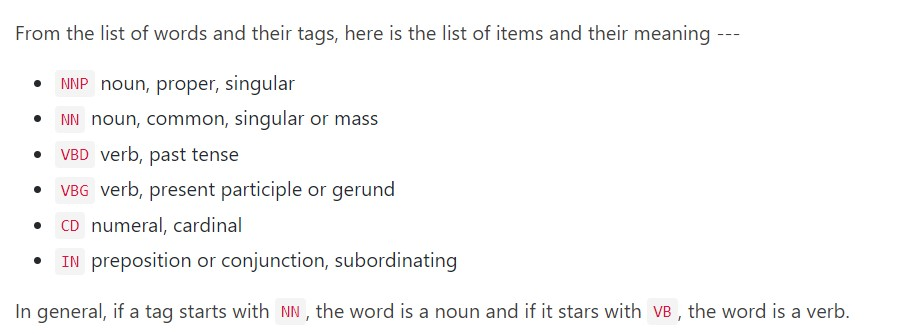

In [ ]:
sentence = """At eight o'clock on Thursday morning ... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
print('############### Tokens ################\n\n',tokens)
tagged = nltk.pos_tag(tokens)
print("\n############# Averaged_perceptron_tagger ###############\n")
print(tagged)

entities = nltk.chunk.ne_chunk(tagged)
print("\n############# Entities ###############\n")
print(entities)

print("\n############# Pos Tag ###############\n")
pos_tagged = pos_tag(word_tokenize(sentence))
print(pos_tagged)

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

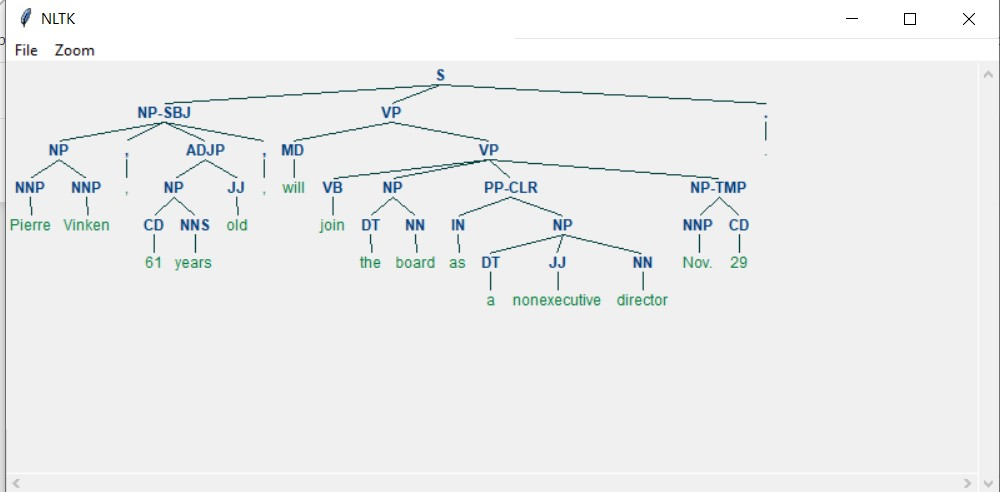

In [ ]:
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [ ]:
lemmatize_sentence(sentence)

### Remove Noise

In [ ]:
import re
sample = 'Go to https://alibabacloud.com/campaign/techshare/ for tech tutorials'
re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', sample)

In [ ]:
sample = 'Go to @alibaba for techshare tutorials'
re.sub('(@[A-Za-z0-9_]+)','', sample)

In [ ]:
import string
string.punctuation

In [ ]:
stop_words = stopwords.words('english')
len(stop_words)
print(stop_words)

In [ ]:
def remove_noise(tokens, stop_words = ()):
    '''Remove @ mentions, hyperlinks, punctuation, and stop words'''

    clean_tokens = []
    lemmatizer = WordNetLemmatizer()

    for token, tag in pos_tag(tokens):
        # Remove Hyperlinks
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Remove twitter handles
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        # Normalize sentence
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            # Get lowercase
            clean_tokens.append(token)

    return clean_tokens

In [ ]:
clean_tokens = remove_noise(tokens)  #tokens from sentence written above
print(clean_tokens)

In [ ]:
sample = 'Hi!!! ^^$&^$%# $%!^( How are (*(*^ &@! you?'
sample_tokens = nltk.word_tokenize(sample)
clean_tokens = remove_noise(sample_tokens)
print(clean_tokens)

#### remove punctuation is better

In [ ]:
sample = 'Hi!!! ^^$&^$%# $%!^( How are (*(*^ &@! you?'
clean_sentence = sample.translate(str.maketrans('', '', string.punctuation))
print(len(clean_sentence))

for i in range(len(clean_sentence)):
    clean_tokens = clean_sentence.split(" ")
    for items in clean_tokens:
        j = items.replace(' ', '')
        clean_tokens.append(j)

print(type(clean_tokens))    
print(clean_tokens)


# Standford

https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK

In [ ]:
# wget http://nlp.stanford.edu/software/stanford-corenlp-full-2018-02-27.zip
# unzip stanford-corenlp-full-2018-02-27.zip
# cd stanford-corenlp-full-2018-02-27

In [ ]:
#Type this in command prompt to activate local host 

# java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer \
# -preload tokenize,ssplit,pos,lemma,ner,parse,depparse \
# -status_port 9000 -port 9000 -timeout 15000 & 

In [ ]:
from nltk.parse import CoreNLPParser

### Lexical Parser

In [ ]:
parser = CoreNLPParser(url='http://localhost:9000')

### Parse tokenized text.

In [ ]:
list(parser.parse('What is the airspeed of an unladen swallow ?'.split()))

### Parse raw string

In [ ]:
list(parser.raw_parse('What is the airspeed of an unladen swallow ?'))

### Neural Dependency Parser

In [ ]:
from nltk.parse.corenlp import CoreNLPDependencyParser
dep_parser = CoreNLPDependencyParser(url='http://localhost:9000')
parses = dep_parser.parse('What is the airspeed of an unladen swallow ?'.split())
[[(governor, dep, dependent) for governor, dep, dependent in parse.triples()] for parse in parses]

### Tokenizer

In [ ]:
parser = CoreNLPParser(url='http://localhost:9000')
list(parser.tokenize('What is the airspeed of an unladen swallow?'))

### POS Tagger

In [ ]:
pos_tagger = CoreNLPParser(url='http://localhost:9000', tagtype='pos')
list(pos_tagger.tag('What is the airspeed of an unladen swallow ?'.split()))

### NER Tagger ... Facing server error, dont know how to solve.

In [ ]:
# ner_tagger = CoreNLPParser(url='http://localhost:9000', tagtype='ner')
# list(ner_tagger.tag(('Rami Eid is studying at Stony Brook University in NY'.split())))